In [1]:
from libraries.mydaq import MyDAQ
from libraries import functions as H
import matplotlib.pyplot as plt
import numpy as np
import nidaqmx as dx
from scipy.signal import sawtooth, square
import libraries
from libraries import PMConverter
from scipy.fft import rfft, rfftfreq, irfft
import time
all_list = [H.RC_C, H.RCRC_CC, H.RLC_sC, H.RLC_sRC, H.RLC_pC, H.RLC_pRL, H.RL_R, H.CL_C, H.RC_R, H.RCRC_RR, H.RLC_sL, H.RLC_sRL, H.RLC_pL, H.RLC_pRC, H.RL_L, H.CL_L, H.RLC_sR, H.RLC_sLC, H.RLC_pR, H.RLC_pLC]

daq = MyDAQ()
daq.name = 'MyDAQ1'
daq.samplerate = 200000
read_channel = 'AI0'	
write_channel = 'AO0'

In [15]:
duration = 5
amplitude = 8
freq = 20000
phase = 0
_, signal = daq.generateWaveform('sine', daq.samplerate, freq, amplitude, phase, duration)


In [16]:
daq.write(signal, 'AO0')

Binary: 01001000 01100101 01101100 01101100 01101111 00100001
FM Signal (Type 1): [  0 180   0   0 180   0   0   0   0 180 180   0   0 180   0 180   0 180
 180   0 180 180   0   0   0 180 180   0 180 180   0   0   0 180 180   0
 180 180 180 180   0   0 180   0   0   0   0 180]
960000
writeTask.start took 0.023476 seconds.


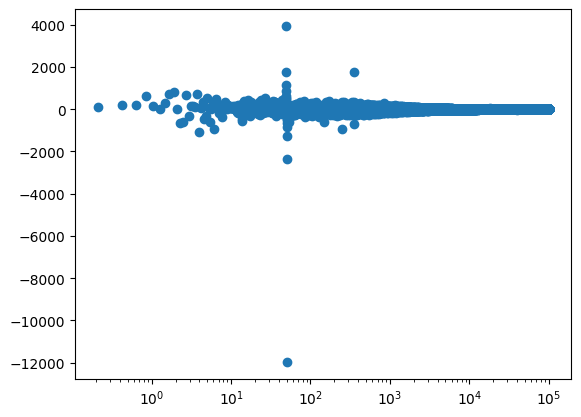

Recovered Binary: 01001000 01100101 01101100 01101100 01101111 00100001
Recovered Text: Hello!


In [18]:
PM = PMConverter()
text = "Hello!"

binary = PM.text_to_binary(text)
print("Binary:", binary)

fm_signal = PM.binary_to_pm(binary, fmType=1)
print("FM Signal (Type 1):", fm_signal)

voltages = PM.pm_to_voltage_array(fm_signal, 20000, freq, daq.samplerate, amplitude)
#voltages = signal
print(len(voltages))
data = daq.readwrite(voltages, read_channel, write_channel)

fft = np.fft.rfft(data)
freqs = np.fft.rfftfreq(len(data), 1/daq.samplerate)
plt.scatter(freqs, fft)
plt.xscale('log')
plt.show()

binary_back = PM.pm_to_binary(fm_signal, fmType=1)
print("Recovered Binary:", binary_back)

text_back = PM.binary_to_text(binary_back)
print("Recovered Text:", text_back)
